In [1]:
import pandas as pd

# File paths
stocks_data_path = '/Users/hanshookoomsing/Documents/undergraduate_project/LSTM_TensorFlow/stocks.csv'
macroeconomic_data_path = '/Users/hanshookoomsing/Documents/undergraduate_project/LSTM_TensorFlow/final_merged_data.csv'
output_path = '/Users/hanshookoomsing/Documents/undergraduate_project/LSTM_TensorFlow/stocks_and_macro.csv'

# Load datasets
stocks_df = pd.read_csv(stocks_data_path, parse_dates=['Date'])
macroeconomic_df = pd.read_csv(macroeconomic_data_path, parse_dates=['Date'])

# Check the first few rows to understand the structure
print("Stocks DataFrame:")
print(stocks_df.head())
print("\nMacroeconomic DataFrame:")
print(macroeconomic_df.head())

# Ensure 'Date' columns are in datetime format
stocks_df['Date'] = pd.to_datetime(stocks_df['Date'])
macroeconomic_df['Date'] = pd.to_datetime(macroeconomic_df['Date'])

# Ensure numerical columns are in the correct data type
stocks_df['Close'] = pd.to_numeric(stocks_df['Close'], errors='coerce')
macroeconomic_df['Interest Rate'] = pd.to_numeric(macroeconomic_df['Interest Rate'], errors='coerce')
macroeconomic_df['Inflation Rate'] = pd.to_numeric(macroeconomic_df['Inflation Rate'], errors='coerce')
macroeconomic_df['GDP'] = pd.to_numeric(macroeconomic_df['GDP'], errors='coerce')

# Check for any remaining non-numeric values
print("\nCheck for non-numeric values in 'Close' column:")
print(stocks_df[pd.to_numeric(stocks_df['Close'], errors='coerce').isna()])

print("\nCheck for non-numeric values in 'Interest Rate' column:")
print(macroeconomic_df[pd.to_numeric(macroeconomic_df['Interest Rate'], errors='coerce').isna()])

print("\nCheck for non-numeric values in 'Inflation Rate' column:")
print(macroeconomic_df[pd.to_numeric(macroeconomic_df['Inflation Rate'], errors='coerce').isna()])

print("\nCheck for non-numeric values in 'GDP' column:")
print(macroeconomic_df[pd.to_numeric(macroeconomic_df['GDP'], errors='coerce').isna()])

# Merge datasets on 'Date'
merged_df = pd.merge(stocks_df, macroeconomic_df, on='Date', how='left')

# Save the final merged data to a CSV file
merged_df.to_csv(output_path, index=False)

print(f"Merged data saved to {output_path}")


Stocks DataFrame:
        Date Stock      Close
0 2001-01-04  AAPL   0.304688
1 2001-01-04     F  26.937500
2 2001-01-04  AMZN   0.775000
3 2001-01-04   JPM  52.000000
4 2001-01-04    MS  88.687500

Macroeconomic DataFrame:
        Date  Interest Rate  Inflation Rate           GDP
0 2000-07-03           7.03         2.71297  10320.721065
1 2000-07-04            NaN         2.71297  10321.999098
2 2000-07-05           6.52         2.71297  10323.277130
3 2000-07-06           6.51         2.71297  10324.555163
4 2000-07-07           6.42         2.71297  10325.833196

Check for non-numeric values in 'Close' column:
Empty DataFrame
Columns: [Date, Stock, Close]
Index: []

Check for non-numeric values in 'Interest Rate' column:
           Date  Interest Rate  Inflation Rate           GDP
1    2000-07-04            NaN        2.712970  10321.999098
45   2000-09-04            NaN        2.897082  10401.237120
70   2000-10-09            NaN        2.919941  10438.742870
103  2000-11-23       

First few rows of the dataset:
        Date Stock      Close  Interest Rate  Inflation Rate         GDP
0 2001-01-04  AAPL   0.304688           5.92        2.878468  10474.5233
1 2001-01-04     F  26.937500           5.92        2.878468  10474.5233
2 2001-01-04  AMZN   0.775000           5.92        2.878468  10474.5233
3 2001-01-04   JPM  52.000000           5.92        2.878468  10474.5233
4 2001-01-04    MS  88.687500           5.92        2.878468  10474.5233

Missing values in each column:
Date                0
Stock               0
Close               0
Interest Rate     392
Inflation Rate      0
GDP                 0
dtype: int64

Date range of the dataset:
Start date: 2001-01-04 00:00:00
End date: 2023-12-29 00:00:00

Number of unique stocks:
8

Number of stock entries per year:
Year
2001    1968
2002    2016
2003    2016
2004    2016
2005    2016
2006    2008
2007    2008
2008    2024
2009    2016
2010    2016
2011    2016
2012    2000
2013    2016
2014    2016
2015    2016
2

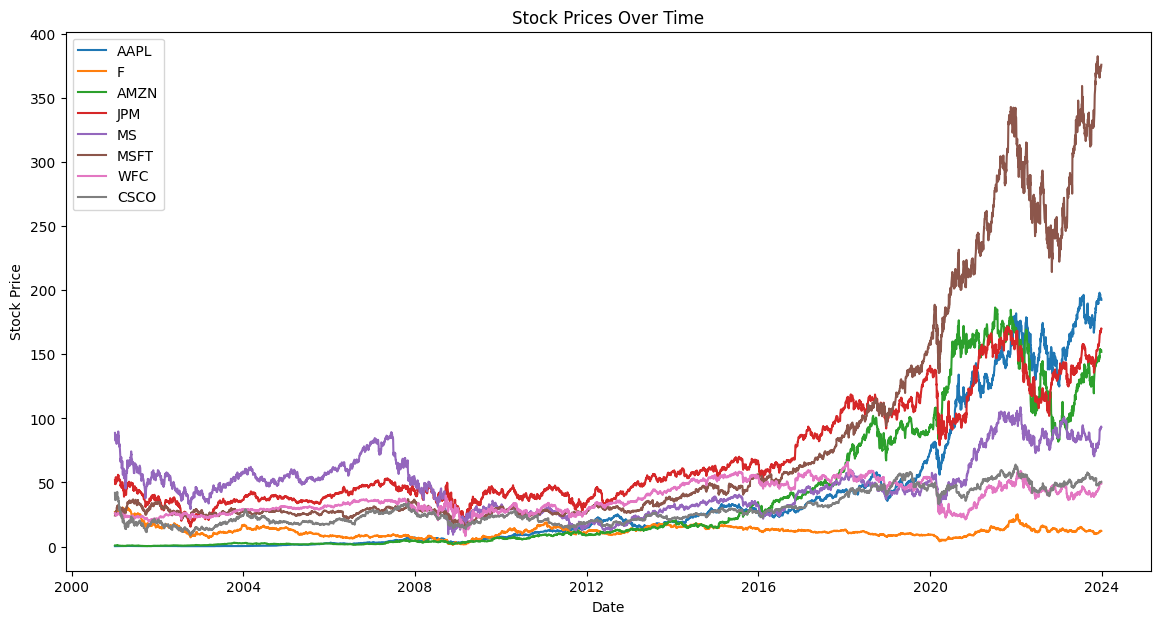

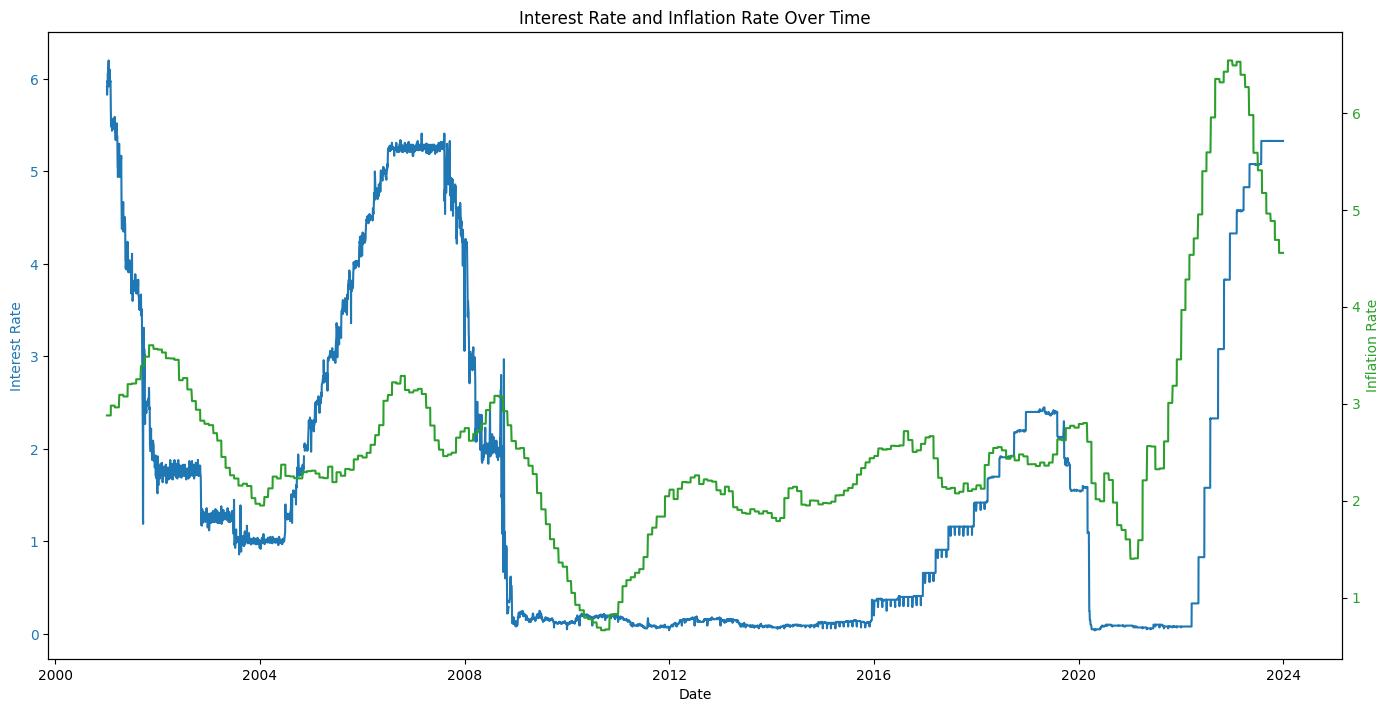

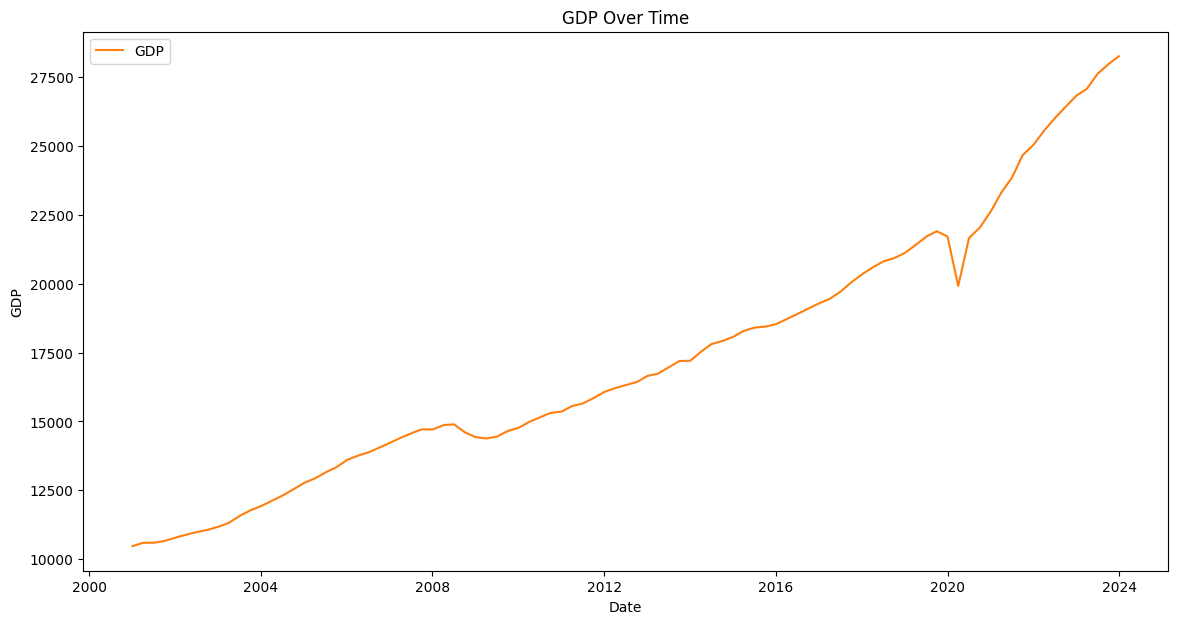

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# File path
data_path = '/Users/hanshookoomsing/Documents/undergraduate_project/LSTM_TensorFlow/stocks_and_macro.csv'

# Load the dataset
df = pd.read_csv(data_path, parse_dates=['Date'])

# Check the first few rows to understand the structure
print("First few rows of the dataset:")
print(df.head())

# Check for missing values
print("\nMissing values in each column:")
print(df.isna().sum())

# Check the date range of the dataset
print("\nDate range of the dataset:")
print(f"Start date: {df['Date'].min()}")
print(f"End date: {df['Date'].max()}")

# Check the number of unique stocks
print("\nNumber of unique stocks:")
print(df['Stock'].nunique())

# Check the number of entries per year
df['Year'] = df['Date'].dt.year
entries_per_year = df['Year'].value_counts().sort_index()
print("\nNumber of stock entries per year:")
print(entries_per_year)

# Plot the stock data for all companies
stocks = df['Stock'].unique()
plt.figure(figsize=(14, 7))
for stock in stocks:
    stock_data = df[df['Stock'] == stock]
    plt.plot(stock_data['Date'], stock_data['Close'], label=stock)

plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Prices Over Time')
plt.legend()
plt.show()

# Plot macroeconomic data
fig, ax1 = plt.subplots(figsize=(14, 7))

ax1.set_xlabel('Date')
ax1.set_ylabel('Interest Rate', color='tab:blue')
ax1.plot(df['Date'], df['Interest Rate'], color='tab:blue', label='Interest Rate')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Inflation Rate', color='tab:green')  # we already handled the x-label with ax1
ax2.plot(df['Date'], df['Inflation Rate'], color='tab:green', label='Inflation Rate')
ax2.tick_params(axis='y', labelcolor='tab:green')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Interest Rate and Inflation Rate Over Time')
plt.show()

plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['GDP'], label='GDP', color='tab:orange')
plt.xlabel('Date')
plt.ylabel('GDP')
plt.title('GDP Over Time')
plt.legend()
plt.show()

# Remove the 'Year' column from the DataFrame
df.drop(columns=['Year'], inplace=True)


First few rows of the dataset:
        Date Stock      Close  Interest Rate  Inflation Rate         GDP
0 2001-01-04  AAPL   0.304688           5.92        2.878468  10474.5233
1 2001-01-04     F  26.937500           5.92        2.878468  10474.5233
2 2001-01-04  AMZN   0.775000           5.92        2.878468  10474.5233
3 2001-01-04   JPM  52.000000           5.92        2.878468  10474.5233
4 2001-01-04    MS  88.687500           5.92        2.878468  10474.5233

Missing values in each column:
Date                0
Stock               0
Close               0
Interest Rate     392
Inflation Rate      0
GDP                 0
dtype: int64

Date range of the dataset:
Start date: 2001-01-04 00:00:00
End date: 2023-12-29 00:00:00

Number of unique stocks:
8

Number of stock entries per year:
Year
2001    1968
2002    2016
2003    2016
2004    2016
2005    2016
2006    2008
2007    2008
2008    2024
2009    2016
2010    2016
2011    2016
2012    2000
2013    2016
2014    2016
2015    2016
2

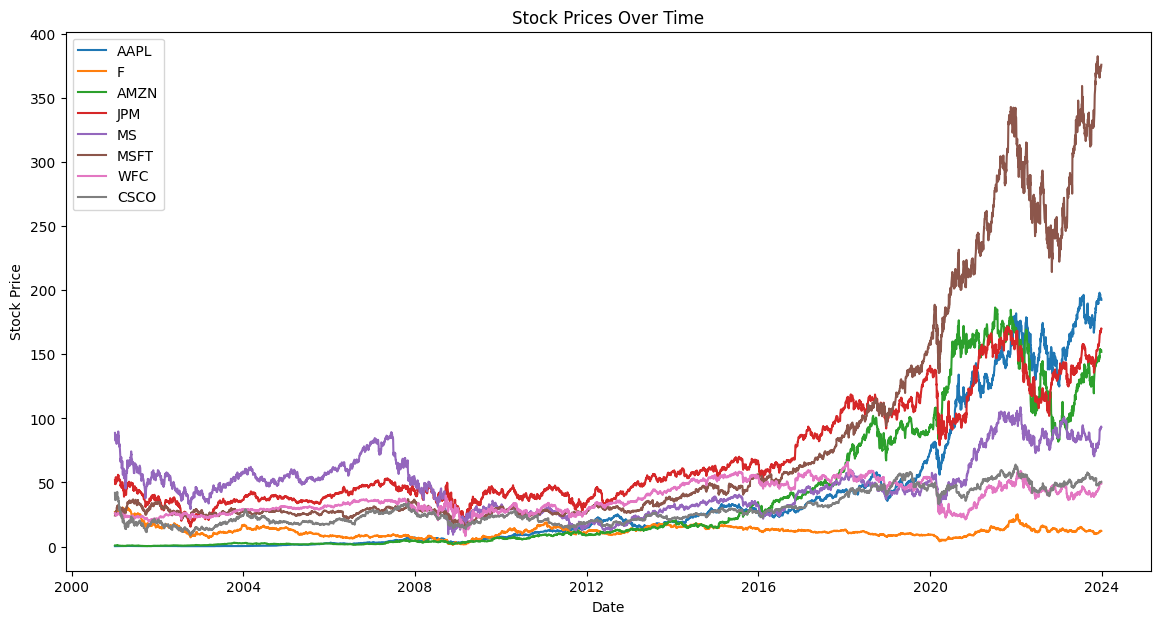

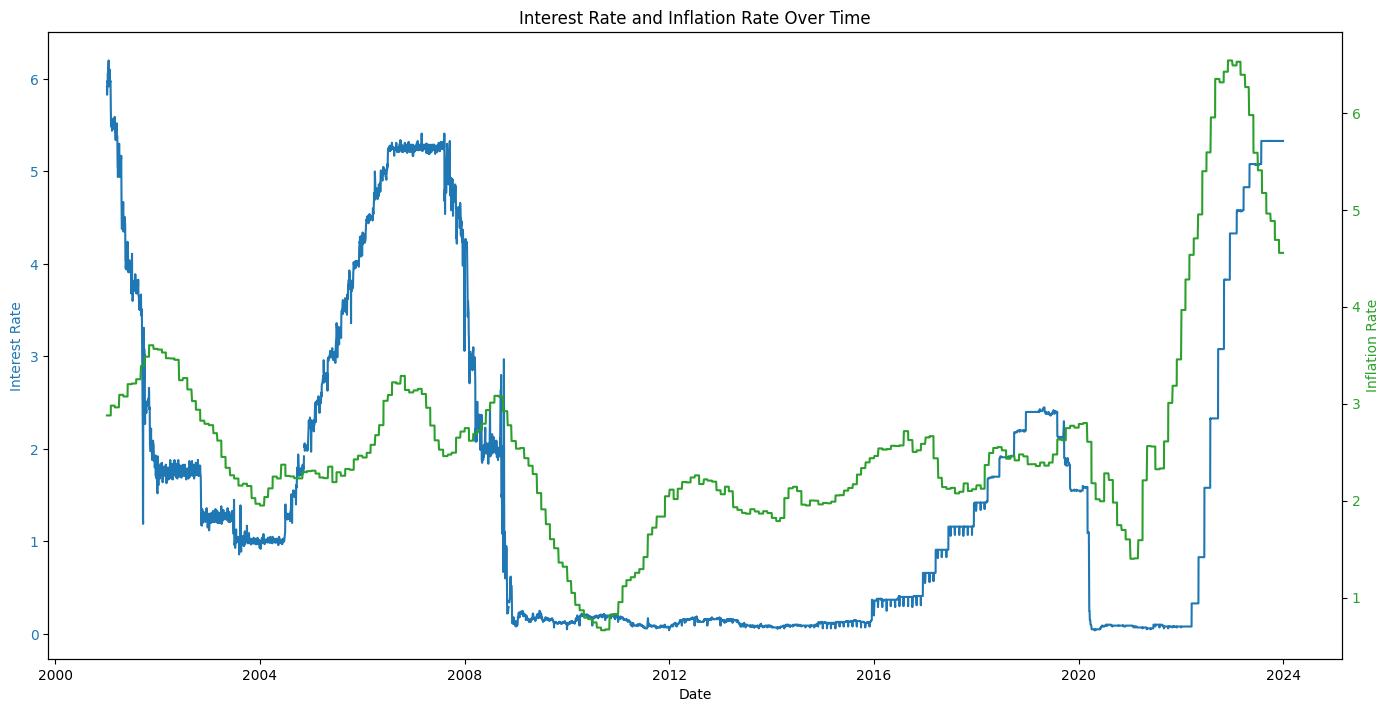

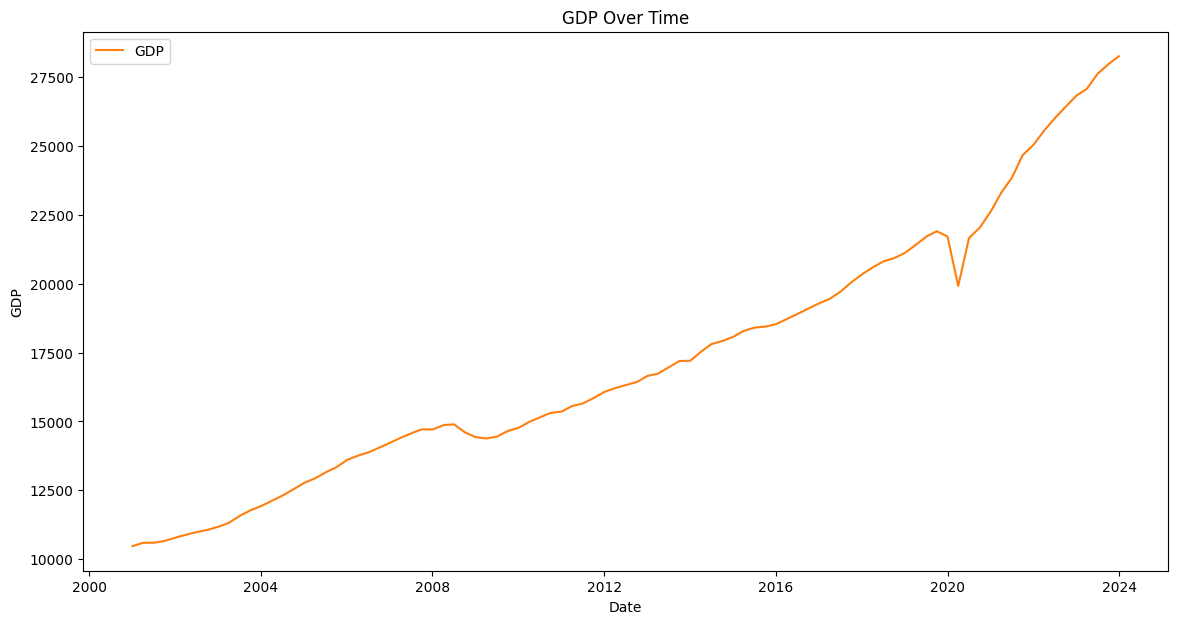

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# File path
data_path = '/Users/hanshookoomsing/Documents/undergraduate_project/LSTM_TensorFlow/stocks_and_macro.csv'

# Load the dataset
df = pd.read_csv(data_path, parse_dates=['Date'])

# Check the first few rows to understand the structure
print("First few rows of the dataset:")
print(df.head())

# Check for missing values
print("\nMissing values in each column:")
print(df.isna().sum())

# Check the date range of the dataset
print("\nDate range of the dataset:")
print(f"Start date: {df['Date'].min()}")
print(f"End date: {df['Date'].max()}")

# Check the number of unique stocks
print("\nNumber of unique stocks:")
print(df['Stock'].nunique())

# Check the number of entries per year
df['Year'] = df['Date'].dt.year
entries_per_year = df['Year'].value_counts().sort_index()
print("\nNumber of stock entries per year:")
print(entries_per_year)

# Remove the 'Year' column after checking entries per year
df.drop(columns=['Year'], inplace=True)

# Check for missing data patterns
missing_data_by_date = df[df['Interest Rate'].isna()]['Date'].value_counts().sort_index()
print("\nMissing Interest Rate data by date:")
print(missing_data_by_date)

# Plot the stock data for all companies
stocks = df['Stock'].unique()
plt.figure(figsize=(14, 7))
for stock in stocks:
    stock_data = df[df['Stock'] == stock]
    plt.plot(stock_data['Date'], stock_data['Close'], label=stock)

plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Prices Over Time')
plt.legend()
plt.show()

# Plot macroeconomic data
fig, ax1 = plt.subplots(figsize=(14, 7))

ax1.set_xlabel('Date')
ax1.set_ylabel('Interest Rate', color='tab:blue')
ax1.plot(df['Date'], df['Interest Rate'], color='tab:blue', label='Interest Rate')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Inflation Rate', color='tab:green')  # we already handled the x-label with ax1
ax2.plot(df['Date'], df['Inflation Rate'], color='tab:green', label='Inflation Rate')
ax2.tick_params(axis='y', labelcolor='tab:green')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Interest Rate and Inflation Rate Over Time')
plt.show()

plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['GDP'], label='GDP', color='tab:orange')
plt.xlabel('Date')
plt.ylabel('GDP')
plt.title('GDP Over Time')
plt.legend()
plt.show()


In [6]:
import pandas as pd

# File path
data_path = '/Users/hanshookoomsing/Documents/undergraduate_project/LSTM_TensorFlow/stocks_and_macro.csv'

# Load the dataset
df = pd.read_csv(data_path, parse_dates=['Date'])

# Check for missing values
print("\nMissing values in each column:")
print(df.isna().sum())

# Identify dates where stock data is missing (considering Close prices as a reference)
missing_stock_dates = df[df['Close'].isna()]['Date'].unique()
print("\nDates where stock data is missing:")
print(missing_stock_dates)

# Identify dates where interest rate data is missing
missing_interest_dates = df[df['Interest Rate'].isna()]['Date'].unique()
print("\nDates where interest rate data is missing:")
print(missing_interest_dates)

# Compare missing dates
missing_stock_dates_set = set(missing_stock_dates)
missing_interest_dates_set = set(missing_interest_dates)

common_missing_dates = missing_stock_dates_set.intersection(missing_interest_dates_set)
unique_missing_stock_dates = missing_stock_dates_set - missing_interest_dates_set
unique_missing_interest_dates = missing_interest_dates_set - missing_stock_dates_set

print("\nCommon missing dates (both stock and interest rate data):")
print(sorted(common_missing_dates))

print("\nUnique missing stock dates:")
print(sorted(unique_missing_stock_dates))

print("\nUnique missing interest rate dates:")
print(sorted(unique_missing_interest_dates))



Missing values in each column:
Date                0
Stock               0
Close               0
Interest Rate     392
Inflation Rate      0
GDP                 0
dtype: int64

Dates where stock data is missing:
<DatetimeArray>
[]
Length: 0, dtype: datetime64[ns]

Dates where interest rate data is missing:
<DatetimeArray>
['2001-03-27 00:00:00', '2001-10-08 00:00:00', '2001-11-12 00:00:00',
 '2002-10-14 00:00:00', '2002-11-11 00:00:00', '2003-10-10 00:00:00',
 '2003-10-13 00:00:00', '2003-10-30 00:00:00', '2003-10-31 00:00:00',
 '2003-11-11 00:00:00', '2004-10-11 00:00:00', '2004-11-11 00:00:00',
 '2005-10-10 00:00:00', '2005-11-11 00:00:00', '2006-10-09 00:00:00',
 '2006-11-06 00:00:00', '2006-11-14 00:00:00', '2007-10-08 00:00:00',
 '2007-11-12 00:00:00', '2008-10-13 00:00:00', '2008-11-11 00:00:00',
 '2009-10-12 00:00:00', '2009-11-11 00:00:00', '2010-10-11 00:00:00',
 '2010-11-11 00:00:00', '2011-10-10 00:00:00', '2011-11-11 00:00:00',
 '2012-10-08 00:00:00', '2012-11-12 00:00:00'

In [8]:
import pandas as pd

# File path
data_path = '/Users/hanshookoomsing/Documents/undergraduate_project/LSTM_TensorFlow/stocks_and_macro.csv'
output_path = '/Users/hanshookoomsing/Documents/undergraduate_project/LSTM_TensorFlow/processed_data.csv'

# Load the dataset
df = pd.read_csv(data_path, parse_dates=['Date'])

# Forward fill missing interest rate values
df['Interest Rate'].ffill(inplace=True)

# Save the dataset with forward filled interest rate data
df.to_csv(output_path, index=False)

print(f"Processed data saved to {output_path}")

Processed data saved to /Users/hanshookoomsing/Documents/undergraduate_project/LSTM_TensorFlow/processed_data.csv



Missing values in each column:
Date              0
Stock             0
Close             0
Interest Rate     0
Inflation Rate    0
GDP               0
dtype: int64

Date range of the dataset:
Start date: 2001-01-04 00:00:00
End date: 2023-12-29 00:00:00

Number of unique stocks:
8

Number of entries per day (should be 8 for each day):
8    5783
Name: count, dtype: int64


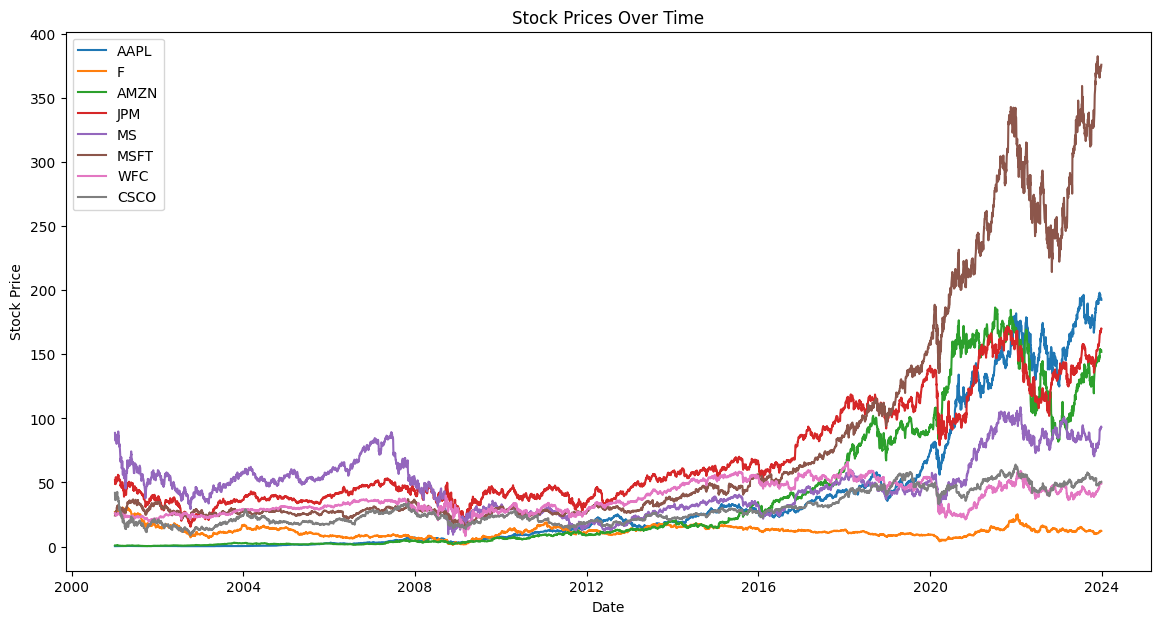

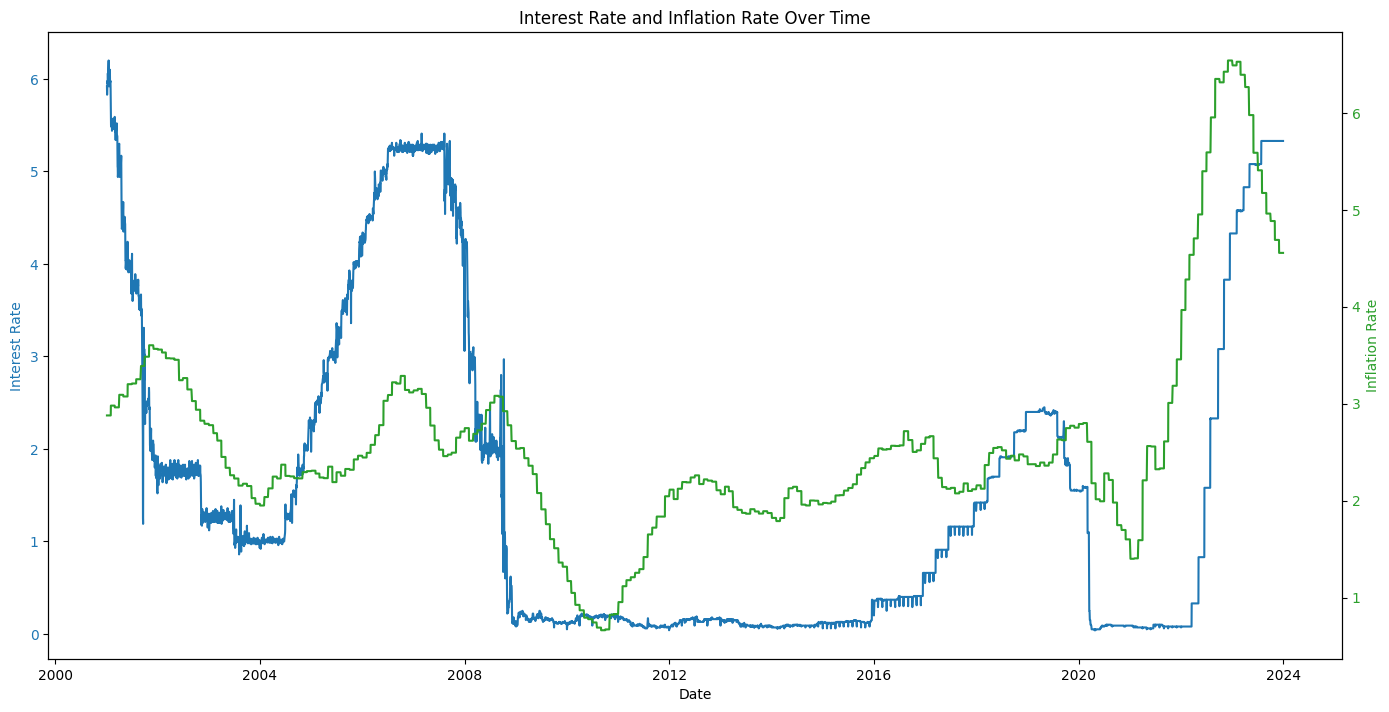

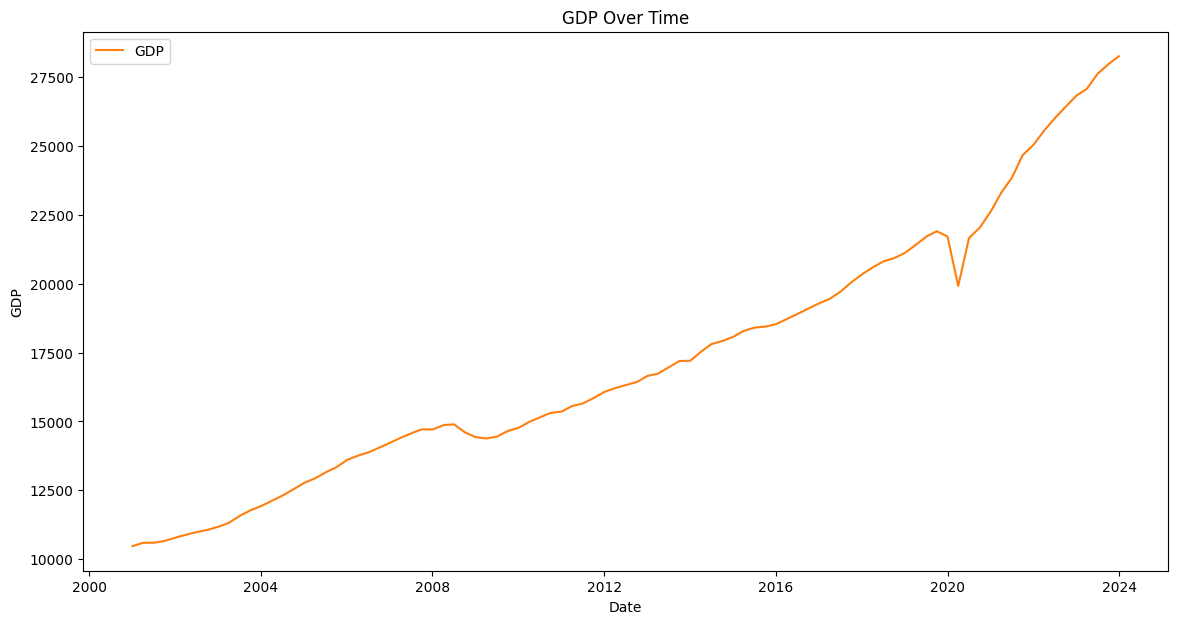

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# File path
processed_data_path = '/Users/hanshookoomsing/Documents/undergraduate_project/LSTM_TensorFlow/processed_data.csv'

# Load the dataset
df = pd.read_csv(processed_data_path, parse_dates=['Date'])

# Check for missing values
print("\nMissing values in each column:")
print(df.isna().sum())

# Check the date range of the dataset
print("\nDate range of the dataset:")
print(f"Start date: {df['Date'].min()}")
print(f"End date: {df['Date'].max()}")

# Check the number of unique stocks
print("\nNumber of unique stocks:")
print(df['Stock'].nunique())

# Check the number of entries per day
entries_per_day = df.groupby('Date').size()
print("\nNumber of entries per day (should be 8 for each day):")
print(entries_per_day.value_counts())

# Plot the stock data for all companies
stocks = df['Stock'].unique()
plt.figure(figsize=(14, 7))
for stock in stocks:
    stock_data = df[df['Stock'] == stock]
    plt.plot(stock_data['Date'], stock_data['Close'], label=stock)

plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Prices Over Time')
plt.legend()
plt.show()

# Plot macroeconomic data
fig, ax1 = plt.subplots(figsize=(14, 7))

ax1.set_xlabel('Date')
ax1.set_ylabel('Interest Rate', color='tab:blue')
ax1.plot(df['Date'], df['Interest Rate'], color='tab:blue', label='Interest Rate')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Inflation Rate', color='tab:green')  # we already handled the x-label with ax1
ax2.plot(df['Date'], df['Inflation Rate'], color='tab:green', label='Inflation Rate')
ax2.tick_params(axis='y', labelcolor='tab:green')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Interest Rate and Inflation Rate Over Time')
plt.show()

plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['GDP'], label='GDP', color='tab:orange')
plt.xlabel('Date')
plt.ylabel('GDP')
plt.title('GDP Over Time')
plt.legend()
plt.show()


In [10]:
import pandas as pd

# File path
processed_data_path = '/Users/hanshookoomsing/Documents/undergraduate_project/LSTM_TensorFlow/processed_data.csv'

# Load the dataset
df = pd.read_csv(processed_data_path, parse_dates=['Date'])

# Check the number of entries per year
df['Year'] = df['Date'].dt.year
entries_per_year = df['Year'].value_counts().sort_index()
print("\nNumber of stock entries per year:")
print(entries_per_year)

# Remove the 'Year' column after checking entries per year
df.drop(columns=['Year'], inplace=True)



Number of stock entries per year:
Year
2001    1968
2002    2016
2003    2016
2004    2016
2005    2016
2006    2008
2007    2008
2008    2024
2009    2016
2010    2016
2011    2016
2012    2000
2013    2016
2014    2016
2015    2016
2016    2016
2017    2008
2018    2008
2019    2016
2020    2024
2021    2016
2022    2008
2023    2000
Name: count, dtype: int64
